In [94]:
# Importar
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from sklearn.compose import make_column_selector, make_column_transformer
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [95]:
#conectar google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQPIHj2zduhCmXT44ZMBjUJ6d0CaFmEIheo4D0k-4jJGD-po7W-mebgUCYxxzVfpi3qLI_vKwOp4U3F/pub?output=csv'
df = pd.read_csv(url)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [97]:
#Explorar y limpiar los datos si es necesario
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicates: 0
Missing Values: 0


In [98]:
# Explorar y limpiar los datos si es necesario, buscar inconsistencias.
cat_cols = df.select_dtypes(include = 'object')
for col in cat_cols:
  print(col)
  print(df[col].value_counts())

Sex
M    725
F    193
Name: Sex, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [99]:
#Comprobar
df['HeartDisease'].mean()
#se evidencia balance en la recolección.

0.5533769063180828

In [100]:
#Div caracteristicas y objetivo
X = df.drop(columns = 'HeartDisease')
y = df['HeartDisease']

In [101]:
#Realizar una división train-test en tus datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [102]:
# Utilizar un transformador de columna para escalar las características numéricas y realizar una codificación one-hot a las características categóricas.
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')
     
#Utilizar un transformador de columna para escalar las características numéricas y realizar una codificación one-hot a las características categóricas.
cat_tuple = (OneHotEncoder(sparse = False, handle_unknown = 'ignore'), cat_selector)
num_tuple = (StandardScaler(), num_selector)
    

In [103]:
# Utilizar un transformador de columna para escalar las características numéricas y realizar una codificación one-hot a las características categóricas.
col_transformer = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')
     

# Transformar datos.
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.fit_transform(X_test)

In [104]:
# Incluir el número de características para cada muestra en tu capa de entrada
input_nodes = X_train.shape[1]
input_nodes
# Definir tu modeloo secuencial de base
modelo = Sequential()  
# Añadir la Capa oculta
modelo.add(Dense(10, 
                input_dim = input_nodes,
                activation = 'relu'))

# Añadir la Capa oculta
modelo.add(Dense(10, activation = 'relu'))
     
# Añadir la Capa de salida
modelo.add(Dense(1, activation = 'sigmoid'))

# Compilar tu modeloo con la función de pérdida correcta y un optimizador (“adam” es una buena opción)
modelo.compile(loss = 'bce', optimizer = 'adam')
     

history = modelo.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs = 10)

Epoch 1/10
22/22 [==============================] - 1s 10ms/step - loss: 0.6296 - val_loss: 0.5843
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.5876 - val_loss: 0.5475
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5528 - val_loss: 0.5129
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 0.5207 - val_loss: 0.4806
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4888 - val_loss: 0.4507
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4575 - val_loss: 0.4245
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4294 - val_loss: 0.4018
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4056 - val_loss: 0.3848
Epoch 9/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3891 - val_loss: 0.3763
Epoch 10/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3765 - val_loss: 0.3657


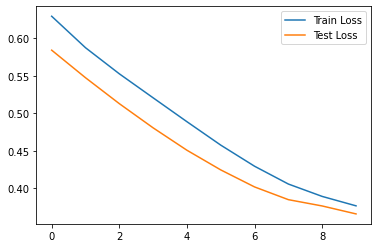

In [105]:
#Graficacion de la historia

plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

###EVALUACIÓN DEL MODELO

In [106]:
train_preds = (modelo.predict(X_train) >= 0.5).astype(float)
test_preds = (modelo.predict(X_test) >= 0.5).astype(float)
print('-'*29 + ' Train Metrics ' + '-'*29)
print(classification_report(train_preds, y_train))
print('\n' + '-'*29 + ' Test Metrics ' + '-'*29)
print(classification_report(test_preds, y_test))

8/8 [==============================] - 0s 2ms/step
----------------------------- Train Metrics -----------------------------
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       311
         1.0       0.86      0.86      0.86       377

    accuracy                           0.85       688
   macro avg       0.85      0.85      0.85       688
weighted avg       0.85      0.85      0.85       688


----------------------------- Test Metrics -----------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       111
         1.0       0.83      0.92      0.88       119

    accuracy                           0.87       230
   macro avg       0.87      0.86      0.86       230
weighted avg       0.87      0.87      0.86       230



In [107]:
#MEJORAMIENTO DEL MODELO

# INSTANCIAR NUEVO MODELO
modelo2 = Sequential()
# Añadí nuevas capas ocultas
modelo2.add(Dense(20, input_dim = input_nodes, activation = 'tanh'))
modelo2.add(Dense(20, activation = 'tanh'))
modelo2.add(Dense(20, activation = 'tanh'))
modelo2.add(Dense(1, activation = 'sigmoid'))
     

In [108]:
# Compilación del modelo
modelo2.compile(loss = 'bce', optimizer = 'adam')
# historial de entrenamiento del modelo
history = modelo2.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    epochs = 5)

Epoch 1/5
22/22 [==============================] - 1s 10ms/step - loss: 0.6763 - val_loss: 0.5671
Epoch 2/5
22/22 [==============================] - 0s 4ms/step - loss: 0.4725 - val_loss: 0.4389
Epoch 3/5
22/22 [==============================] - 0s 4ms/step - loss: 0.3975 - val_loss: 0.3958
Epoch 4/5
22/22 [==============================] - 0s 4ms/step - loss: 0.3687 - val_loss: 0.3737
Epoch 5/5
22/22 [==============================] - 0s 4ms/step - loss: 0.3546 - val_loss: 0.3654


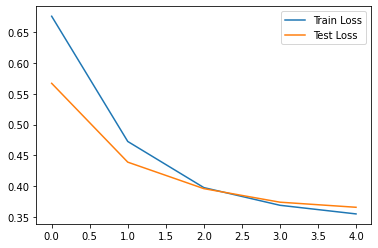

In [109]:
# Grafica hisotria
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [110]:
#evaluación del modelo
train_preds = (modelo2.predict(X_train) >= 0.5).astype(float)
test_preds = (modelo2.predict(X_test) >= 0.5).astype(float)
#train
print(classification_report(train_preds, y_train))
#test
print(classification_report(test_preds, y_test))
     

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       297
         1.0       0.89      0.86      0.88       391

    accuracy                           0.86       688
   macro avg       0.86      0.86      0.86       688
weighted avg       0.86      0.86      0.86       688

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       102
         1.0       0.86      0.89      0.88       128

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



In [111]:
# Instanciar el modelo
modelo3 = Sequential()
     
# Añadir capas
modelo3.add(Dense(30, input_dim = input_nodes, activation = 'linear'))
modelo3.add(Dense(30, activation = 'linear'))
modelo3.add(Dense(30, activation = 'linear'))
modelo3.add(Dense(30, activation = 'linear'))
modelo3.add(Dense(1, activation = 'sigmoid'))
# Comilar modelo
modelo3.compile(loss = 'bce', optimizer = 'adam')

# entrenar
history = modelo3.fit(X_train, y_train,
           validation_data = (X_test, y_test),
           epochs = 10)
     

Epoch 1/10
22/22 [==============================] - 1s 15ms/step - loss: 0.5214 - val_loss: 0.4250
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3955 - val_loss: 0.3708
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3684 - val_loss: 0.3659
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3481 - val_loss: 0.3429
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3404 - val_loss: 0.3454
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3410 - val_loss: 0.3448
Epoch 7/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3341 - val_loss: 0.3359
Epoch 8/10
22/22 [==============================] - 0s 7ms/step - loss: 0.3339 - val_loss: 0.3291
Epoch 9/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3330 - val_loss: 0.3528
Epoch 10/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3348 - val_loss: 0.3288


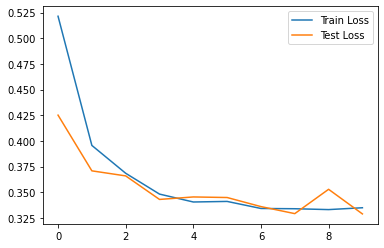

In [112]:

# Graficar
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()
     

In [113]:
# Evaluación
train_preds = (modelo3.predict(X_train) >= 0.5).astype(float)
test_preds = (modelo3.predict(X_test) >= 0.5).astype(float)
#train
print(classification_report(train_preds, y_train))
#test
print(classification_report(test_preds, y_test))

8/8 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       290
         1.0       0.91      0.86      0.89       398

    accuracy                           0.88       688
   macro avg       0.87      0.88      0.87       688
weighted avg       0.88      0.88      0.88       688

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84       104
         1.0       0.86      0.90      0.88       126

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230

